# Ohio Alleycat Resource Data Analysis
---

## In this file we will analyze adoption data collected from Ohio Alleycat Resource. We will inspect and clean three separate dataframes, relating to animals, adoptions, and adopters. We will merge these three into one dataframe to be used for analysis in Tableau.
---

In [1]:
#import the relevant python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Show all columns of out dataframe
pd.set_option("max_columns", None)

---
## First we will analyze the adopters data. 

In [3]:
adopters = pd.read_csv('./data/adopters.csv')

In [4]:
adopters.head()

,OWNERNAME,OWNERADDRESS,OWNERTOWN,OWNERCOUNTY,OWNERPOSTCODE,LATLONG,ADOPTIONNUMBER,ANIMALID,OWNERID
0,"Zilli, Kelly",Mount Adams,Cincinnati,OH,45202,"39.1091295,-84.49468709999996,MountAdamsCincin...",32,21,5
1,"Tolliver (Bucher), Stephanie",6252 Corbly Road #1,Cincinnati,OH,45230,"39.094719,-84.38462099999998,6252CorblyRoad#1C...",33,12,8
2,"O'Dea, James",8335 Vicksburg Drive,Cincinnati,OH,45249,"39.266508,-84.33493599999997,8335VicksburgAven...",34,5,9
3,"O'Dea, James",8335 Vicksburg Drive,Cincinnati,OH,45249,"39.266508,-84.33493599999997,8335VicksburgAven...",35,6,9
4,"Albert, Alyssa",3416 Shaw Avenue apt 9,Cincinnati,OH,45208,"39.137735,-84.43974939999998,3416ShawAvenueapt...",36,2,10


In [5]:
adopters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8583 entries, 0 to 8582
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   OWNERNAME       8582 non-null   object
 1   OWNERADDRESS    8537 non-null   object
 2   OWNERTOWN       8527 non-null   object
 3   OWNERCOUNTY     8549 non-null   object
 4   OWNERPOSTCODE   8539 non-null   object
 5   LATLONG         8571 non-null   object
 6   ADOPTIONNUMBER  8583 non-null   int64 
 7   ANIMALID        8583 non-null   int64 
 8   OWNERID         8583 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 603.6+ KB


---
### We can see that the OWNERCOUNTY value actually contains the state of the adress field, but the formatting of some values is different and there are various mispellings. For example, "OH" and "Ohio".

In [6]:
adopters['OWNERCOUNTY'].value_counts()

OH                4978
Ohio              2279
KY                 763
Kentucky           214
IN                  77
Oh                  62
ohio                34
Indiana             22
Ky                  20
OHIO                20
oh                  19
ky                   6
KENTUCKY             5
NJ                   4
Indiana (IN)         4
IL                   4
FL                   4
Illinois             3
DE                   2
OH.US                2
NC                   2
GA                   2
Massachusetts        2
WV                   2
North Carolina       1
Ohip                 1
Ky - Kentucky        1
TX                   1
Oh,ohio              1
Alabama              1
OH - Ohio            1
NY                   1
kentucky             1
Ohii                 1
Ohi                  1
KS                   1
WA                   1
MO                   1
AZ                   1
SC                   1
US                   1
MI                   1
ME                   1
Name: OWNER

### First, we will address the various forms of Ohio and replace them all with OH. 

In [7]:
adopters['OWNERCOUNTY'].replace(['Ohio', 'Oh', 'oh', 'ohio', 'OHIO', 'Ohip', 'OH.US', 'Ohiop', 'OH - Ohio', 'OB', 'Oh,ohio', 'Ohi', 'Ohii'], 'OH', inplace = True)

In [8]:
adopters['OWNERCOUNTY'].value_counts()

OH                7399
KY                 763
Kentucky           214
IN                  77
Indiana             22
Ky                  20
ky                   6
KENTUCKY             5
NJ                   4
Indiana (IN)         4
FL                   4
IL                   4
Illinois             3
DE                   2
Massachusetts        2
WV                   2
NC                   2
GA                   2
ME                   1
US                   1
MI                   1
TX                   1
MO                   1
AZ                   1
WA                   1
KS                   1
Alabama              1
kentucky             1
North Carolina       1
Ky - Kentucky        1
NY                   1
SC                   1
Name: OWNERCOUNTY, dtype: int64

### That fixed the Ohio values. We will also fix the problems with Kentucky and Indiana, and replace other states with their abbreviations.

In [9]:
adopters['OWNERCOUNTY'].replace(['Kentucky', 'Ky', 'ky', 'KENTUCKY', 'kentucky', 'Ky - Kentucky'], 'KY', inplace = True)

In [10]:
adopters['OWNERCOUNTY'].replace(['Indiana', 'Indiana (IN)'], 'IN', inplace = True)

In [11]:
adopters['OWNERCOUNTY'].replace(['Illinois', 'Alabama', 'Massachusetts', 'North Carolina'], ['IL', 'AL', 'MA', 'NC'], inplace = True)

In [12]:
adopters['OWNERCOUNTY'].value_counts()

OH    7399
KY    1010
IN     103
IL       7
FL       4
NJ       4
NC       3
GA       2
DE       2
WV       2
MA       2
ME       1
AL       1
WA       1
AZ       1
MO       1
MI       1
TX       1
US       1
SC       1
KS       1
NY       1
Name: OWNERCOUNTY, dtype: int64

### There is still one value of "US". Let's see what state they should be.

In [13]:
adopters.loc[adopters['OWNERCOUNTY'] == 'US']

,OWNERNAME,OWNERADDRESS,OWNERTOWN,OWNERCOUNTY,OWNERPOSTCODE,LATLONG,ADOPTIONNUMBER,ANIMALID,OWNERID
455,"Girman, Hannah",208 Eden Avenue,Bellevue,US,41073,"39.1421231,-84.5214818,3303OrmondAvenueapt4Cin...",1623,552,714


### Bellevue is in Kentucky, so we will change this to KY.

In [14]:
adopters['OWNERCOUNTY'].replace('US', 'KY', inplace = True)

---
### Next we will strip the address from the Latitude/Longitude field and split the Latitude and Longitude into separate fields.

In [15]:
#Split the LATLONG column on the commas into a list with three values. 
#The latitude is the first element and the Longitude is the second element of the list
#The third element is the address which we discard.
adopters['LATITUDE'] = adopters['LATLONG'].str.split(',').str[0]

In [16]:
adopters['LONGITUDE'] = adopters['LATLONG'].str.split(',').str[1]

In [17]:
#We can see the Latitude and Longitude columns were added
adopters.head()

,OWNERNAME,OWNERADDRESS,OWNERTOWN,OWNERCOUNTY,OWNERPOSTCODE,LATLONG,ADOPTIONNUMBER,ANIMALID,OWNERID,LATITUDE,LONGITUDE
0,"Zilli, Kelly",Mount Adams,Cincinnati,OH,45202,"39.1091295,-84.49468709999996,MountAdamsCincin...",32,21,5,39.1091295,-84.49468709999996
1,"Tolliver (Bucher), Stephanie",6252 Corbly Road #1,Cincinnati,OH,45230,"39.094719,-84.38462099999998,6252CorblyRoad#1C...",33,12,8,39.094719,-84.38462099999998
2,"O'Dea, James",8335 Vicksburg Drive,Cincinnati,OH,45249,"39.266508,-84.33493599999997,8335VicksburgAven...",34,5,9,39.266508,-84.33493599999997
3,"O'Dea, James",8335 Vicksburg Drive,Cincinnati,OH,45249,"39.266508,-84.33493599999997,8335VicksburgAven...",35,6,9,39.266508,-84.33493599999997
4,"Albert, Alyssa",3416 Shaw Avenue apt 9,Cincinnati,OH,45208,"39.137735,-84.43974939999998,3416ShawAvenueapt...",36,2,10,39.137735,-84.43974939999998


In [18]:
#Check for NaN in Latitude
adopters['LATITUDE'].isnull().value_counts()

False    8571
True       12
Name: LATITUDE, dtype: int64

### We can see there are some Null values in the Latitude, so we will fill them with zeros.

In [19]:
adopters['LATITUDE'] = adopters['LATITUDE'].fillna('0')

In [20]:
adopters['LATITUDE'].isnull().value_counts()

False    8583
Name: LATITUDE, dtype: int64

### And also fill the Null values of Longitude with zeros.

In [21]:
adopters['LONGITUDE'].isnull().value_counts()

False    8556
True       27
Name: LONGITUDE, dtype: int64

In [22]:
adopters['LONGITUDE'] = adopters['LONGITUDE'].fillna('0')

In [23]:
adopters['LONGITUDE'].isnull().value_counts()

False    8583
Name: LONGITUDE, dtype: int64

---
### Finally, we will rename some of the columns.

In [24]:
col_map = {'OWNERADDRESS': 'ADDRESS', 'OWNERTOWN': 'CITY', 'OWNERCOUNTY': 'STATE', 'OWNERPOSTCODE': 'ZIPCODE'}
adopters.rename(columns = col_map, inplace=True)

### We will also drop the columns we don't need.

In [25]:
adopters.drop(columns=['LATLONG'], axis = 1, inplace = True)

---
## Now we will analyze the Animals data.

In [26]:
animals = pd.read_csv('./data/animals.csv')

In [27]:
animals.head(10)

,OWNERID,ADOPTIONNUMBER,ANIMALID,ANIMALNAME,BASECOLOURID,BREEDID,BREEDNAME,DATEOFBIRTH,AGEGROUP,SEX,COMBITESTRESULT,FLVRESULT,DECLAWED,SHELTERLOCATION,DATEBROUGHTIN,MOSTRECENTENTRYDATE,DAYSONSHELTER,ANIMALAGE,WEIGHT,TOTALDAYSONSHELTER,TOTALTIMEONSHELTER,AGEGROUPACTIVEMOVEMENT
0,17521,24504,13118,Xerographica,68,261,Domestic Short Hair,2/19/21,18 weeks to 2 years,0,1,1,0,16,2/19/22,2/19/22,33,1 year 1 month.,7.60,33,4 weeks.,18 weeks to 2 years
1,17239,24187,12976,Long John Silver,3,243,Domestic Long Hair,12/31/20,18 weeks to 2 years,1,1,1,0,3,1/4/22,1/4/22,21,1 year 0 months.,12.00,21,3 weeks.,18 weeks to 2 years
2,7272,10299,5812,Tuna,69,261,Domestic Short Hair,11/17/17,6 months to 2 years,1,1,1,0,10,10/1/18,10/1/18,7,3 years 9 months.,7.30,7,1 week.,6 months to 2 years
3,18061,25437,13528,Greek Valerian,1,252,Domestic Medium Hair,3/30/22,Under 18 weeks,1,1,1,0,32,5/26/22,5/26/22,30,16 weeks.,2.40,30,4 weeks.,Under 18 weeks
4,7989,11377,6519,Jellybean,3,261,Domestic Short Hair,9/10/18,Under 6 months,0,1,1,0,4,12/31/18,12/31/18,17,1 year 11 months.,4.43,17,2 weeks.,Under 6 months
5,16780,23609,12655,Behemoth,3,243,Domestic Long Hair,10/6/20,6 months to 2 years,1,1,1,0,9,10/18/21,10/18/21,21,1 year 1 month.,12.30,21,3 weeks.,6 months to 2 years
6,28,15014,7797,Cricket (Emma),1,261,Domestic Short Hair,5/3/19,Under 6 months,0,1,1,0,19,8/28/19,8/28/19,134,1 year 11 months.,6.69,134,19 weeks.,6 months to 2 years
7,17001,24003,12943,Calamity Jane,67,261,Domestic Short Hair,12/13/16,2 years to 10 years,0,0,0,0,19,12/12/21,12/12/21,17,5 years 0 months.,10.20,17,2 weeks.,2 years to 10 years
8,10897,24260,8599,Orry,84,315,Siamese Mix,2/4/19,2 years to 10 years,1,1,1,0,19,12/30/19,1/25/22,12,3 years 0 months.,12.80,38,5 weeks.,2 years to 10 years
9,10066,15507,8599,Orry,84,315,Siamese Mix,2/4/19,2 years to 10 years,1,1,1,0,19,12/30/19,1/25/22,12,3 years 0 months.,12.80,38,5 weeks.,2 years to 10 years


**Note: duplicate cats, such as Orry seen above, were returned from their orginal adoption and adopted again, so we will not remove the duplicate values.
This is Orry:**
<div>
<img src="./photos/orry.jpeg" width="200"/>
</div>

In [28]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9012 entries, 0 to 9011
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   OWNERID                 9012 non-null   int64  
 1   ADOPTIONNUMBER          9012 non-null   int64  
 2   ANIMALID                9012 non-null   int64  
 3   ANIMALNAME              9012 non-null   object 
 4   BASECOLOURID            9012 non-null   int64  
 5   BREEDID                 9012 non-null   int64  
 6   BREEDNAME               9000 non-null   object 
 7   DATEOFBIRTH             9012 non-null   object 
 8   AGEGROUP                9012 non-null   object 
 9   SEX                     9012 non-null   int64  
 10  COMBITESTRESULT         9012 non-null   int64  
 11  FLVRESULT               9012 non-null   int64  
 12  DECLAWED                9012 non-null   int64  
 13  SHELTERLOCATION         9012 non-null   int64  
 14  DATEBROUGHTIN           9012 non-null   

---
### First we will address some of the coded values and change them to values that are easier to interpret. We will change the values of the 'Sex' column to male and female. 1 is male and 0 is female. 

In [29]:
animals['SEX'].replace([0, 1], ['Female', 'Male'], inplace = True)

### We will also change the values of the 'Declawed' column. 0 = not declawed, 1 = declawed.

In [30]:
animals['DECLAWED'].replace([0, 1], ['Not Declawed', 'Declawed'], inplace = True)

### Next we will fill in the data for the Combitest Result. A result of 2 means the cat tested positive for Feline Immunodefciency Virus. Otherwise the cat is negative.  We will also rename this column.

In [31]:
animals['COMBITESTRESULT'].replace([[0,1],2], ['FIV-','FIV+'], inplace = True)

### And also we will fill in the data for the FLVRESULT field. A result of 2 means that cat tested positive for Feline Leukemia Virus. Otherwise the cat is negative. We will also rename this column.

In [32]:
animals['FLVRESULT'].replace([[0,1],2], ['FELV-','FELV+'], inplace = True)

### To check this we will look for a cat that is FIV+ and FELV-, Otto Tunes. Here is a photo of this handsome gentleman:
<div>
<img src="./photos/otto.jpeg" width="200"/>
</div>

In [33]:
animals.loc[animals['ANIMALNAME'] == 'Otto Toons']

,OWNERID,ADOPTIONNUMBER,ANIMALID,ANIMALNAME,BASECOLOURID,BREEDID,BREEDNAME,DATEOFBIRTH,AGEGROUP,SEX,COMBITESTRESULT,FLVRESULT,DECLAWED,SHELTERLOCATION,DATEBROUGHTIN,MOSTRECENTENTRYDATE,DAYSONSHELTER,ANIMALAGE,WEIGHT,TOTALDAYSONSHELTER,TOTALTIMEONSHELTER,AGEGROUPACTIVEMOVEMENT
1398,17677,24696,11742,Otto Toons,79,261,Domestic Short Hair,5/10/19,2 years to 10 years,Male,FIV+,FELV-,Not Declawed,2,5/13/21,5/13/21,337,2 years 11 months.,16.4,337,11 months.,2 years to 10 years


In [34]:
animals.rename(columns = {'COMBITESTRESULT': 'FIV_STATUS', 'FLVRESULT': 'FELV_STATUS'}, inplace = True)

### We can see that the replacement worked as intended.
---

### To get the Base Color id, we will merge a dataframe that contains the Base Color table.

In [35]:
color = pd.read_csv('./data/coat_color.csv')

In [36]:
color['BASECOLOUR'].value_counts()

Sable                      1
Gray and White             1
Gray Tabby and White       1
Orange Tabby and White     1
Orange Tabby               1
Tortie Point               1
White and Black            1
Black Tabby                1
Lilac Point                1
Lynx Point                 1
Seal Point                 1
Silver Tabby               1
Silver Tabby and White     1
Torbie                     1
Torbie and White           1
White and Brown Tabby      1
White and Buff Tabby       1
White and Gray             1
White and Gray Tabby       1
White and Orange Tabby     1
White and Silver Tabby     1
Gray Tabby                 1
Gray                       1
Black                      1
Flame Point                1
White                      1
Tortie                     1
Brown Tabby with White     1
Dilute Torbie and White    1
Black Smoke                1
Smoke Tabby                1
Smoke Tabby and White      1
White and Smoke Tabby      1
Chocolate Point            1
Snowshoe      

### This is a mess! We will replace some of the values that seem to be identical, such as "White and Orange Tabby" and "Orange and White Tabby", to reduce the number of unique values.

In [37]:
color['BASECOLOUR'].replace(['White and Orange Tabby', 
                             'White and Buff Tabby', 
                             'White and Brown Tabby', 
                             'Brown Tabby with White', 
                             'White and Gray Tabby', 
                             'White and Silver Tabby', 
                             'White and Smoke Tabby',
                             'White and Torbie',
                             'White and Gray',
                             'White and Black'], 
                            ['Orange Tabby and White', 
                             'Buff Tabby and White', 
                             'Brown Tabby and White', 
                             'Brown Tabby and White',
                             'Gray Tabby and White', 
                             'Silver Tabby and White', 
                             'Smoke Tabby and White',
                             'Torbie and White',
                             'Gray and White',
                             'Black and White'],
                           inplace = True)

In [38]:
color['BASECOLOUR'].sort_values().value_counts()

Brown Tabby and White      3
Gray Tabby and White       2
Buff Tabby and White       2
Orange Tabby and White     2
Silver Tabby and White     2
Smoke Tabby and White      2
Gray and White             2
Torbie and White           2
Black and White            2
Torbie                     1
Lynx Point                 1
Tortie                     1
Smoke Tabby                1
Silver Tabby               1
Seal Point                 1
Sable                      1
Tortie Point               1
Orange Tabby               1
Snowshoe                   1
Black                      1
Lilac Point                1
Black Smoke                1
Gray Tabby                 1
Gray                       1
Flame Point                1
Dilute Tortie              1
Dilute Torbie and White    1
Dilute Torbie              1
Dilute Calico              1
Chocolate Point            1
Calico                     1
Buff Tabby                 1
Brown Tabby                1
Black Tabby                1
White         

### We need to rename the 'ID' column in  order to merge on the 'BASECOLOURID' in the animals dataframe.

In [39]:
color.rename({'ID': 'BASECOLOURID'}, axis = 1, inplace = True)

### We can drop the columns we don't need.

In [40]:
color.drop(columns=['BASECOLOURDESCRIPTION', 'ADOPTAPETCOLOUR', 'ISRETIRED'], axis = 1, inplace = True)

### Now we can merge the color and animals dataframes.

In [41]:
animals = animals.merge(color, on = 'BASECOLOURID', how = 'left')

In [42]:
animals.head()

,OWNERID,ADOPTIONNUMBER,ANIMALID,ANIMALNAME,BASECOLOURID,BREEDID,BREEDNAME,DATEOFBIRTH,AGEGROUP,SEX,FIV_STATUS,FELV_STATUS,DECLAWED,SHELTERLOCATION,DATEBROUGHTIN,MOSTRECENTENTRYDATE,DAYSONSHELTER,ANIMALAGE,WEIGHT,TOTALDAYSONSHELTER,TOTALTIMEONSHELTER,AGEGROUPACTIVEMOVEMENT,BASECOLOUR
0,17521,24504,13118,Xerographica,68,261,Domestic Short Hair,2/19/21,18 weeks to 2 years,Female,FIV-,FELV-,Not Declawed,16,2/19/22,2/19/22,33,1 year 1 month.,7.60,33,4 weeks.,18 weeks to 2 years,Brown Tabby
1,17239,24187,12976,Long John Silver,3,243,Domestic Long Hair,12/31/20,18 weeks to 2 years,Male,FIV-,FELV-,Not Declawed,3,1/4/22,1/4/22,21,1 year 0 months.,12.00,21,3 weeks.,18 weeks to 2 years,Black and White
2,7272,10299,5812,Tuna,69,261,Domestic Short Hair,11/17/17,6 months to 2 years,Male,FIV-,FELV-,Not Declawed,10,10/1/18,10/1/18,7,3 years 9 months.,7.30,7,1 week.,6 months to 2 years,Orange Tabby
3,18061,25437,13528,Greek Valerian,1,252,Domestic Medium Hair,3/30/22,Under 18 weeks,Male,FIV-,FELV-,Not Declawed,32,5/26/22,5/26/22,30,16 weeks.,2.40,30,4 weeks.,Under 18 weeks,Black
4,7989,11377,6519,Jellybean,3,261,Domestic Short Hair,9/10/18,Under 6 months,Female,FIV-,FELV-,Not Declawed,4,12/31/18,12/31/18,17,1 year 11 months.,4.43,17,2 weeks.,Under 6 months,Black and White


### We can see the BASECOLOUR Column was added as intended.
---

### We will repeat these steps to get the shelter location name by merging with the shelter location table.

In [43]:
shelter_location = pd.read_csv('./data/shelter_location.csv')

In [44]:
shelter_location.rename({'ID': 'SHELTERLOCATION'}, axis = 1, inplace = True)

In [45]:
shelter_location.drop(columns=['LOCATIONDESCRIPTION', 'UNITS', 'ISRETIRED', 'SITEID'], axis = 1, inplace = True)

In [46]:
animals = animals.merge(shelter_location, on = 'SHELTERLOCATION', how = 'left')

In [47]:
animals.head()

,OWNERID,ADOPTIONNUMBER,ANIMALID,ANIMALNAME,BASECOLOURID,BREEDID,BREEDNAME,DATEOFBIRTH,AGEGROUP,SEX,FIV_STATUS,FELV_STATUS,DECLAWED,SHELTERLOCATION,DATEBROUGHTIN,MOSTRECENTENTRYDATE,DAYSONSHELTER,ANIMALAGE,WEIGHT,TOTALDAYSONSHELTER,TOTALTIMEONSHELTER,AGEGROUPACTIVEMOVEMENT,BASECOLOUR,LOCATIONNAME
0,17521,24504,13118,Xerographica,68,261,Domestic Short Hair,2/19/21,18 weeks to 2 years,Female,FIV-,FELV-,Not Declawed,16,2/19/22,2/19/22,33,1 year 1 month.,7.60,33,4 weeks.,18 weeks to 2 years,Brown Tabby,Quarantine Room
1,17239,24187,12976,Long John Silver,3,243,Domestic Long Hair,12/31/20,18 weeks to 2 years,Male,FIV-,FELV-,Not Declawed,3,1/4/22,1/4/22,21,1 year 0 months.,12.00,21,3 weeks.,18 weeks to 2 years,Black and White,Tan Room
2,7272,10299,5812,Tuna,69,261,Domestic Short Hair,11/17/17,6 months to 2 years,Male,FIV-,FELV-,Not Declawed,10,10/1/18,10/1/18,7,3 years 9 months.,7.30,7,1 week.,6 months to 2 years,Orange Tabby,Purple Room
3,18061,25437,13528,Greek Valerian,1,252,Domestic Medium Hair,3/30/22,Under 18 weeks,Male,FIV-,FELV-,Not Declawed,32,5/26/22,5/26/22,30,16 weeks.,2.40,30,4 weeks.,Under 18 weeks,Black,Adoption Room 8
4,7989,11377,6519,Jellybean,3,261,Domestic Short Hair,9/10/18,Under 6 months,Female,FIV-,FELV-,Not Declawed,4,12/31/18,12/31/18,17,1 year 11 months.,4.43,17,2 weeks.,Under 6 months,Black and White,Kitten Room


---
## Next we will bring in the adoptions data.

In [48]:
adoptions = pd.read_csv('./data/adoptions.csv')

In [49]:
adoptions.head()

,ADOPTIONNUMBER,ANIMALID,OWNERID,RETAILERID,MOVEMENTDATE,RETURNDATE,RETURNEDREASONID,RETURNEDBYOWNERID
0,7571,4087,5659,3,12/6/17,None,11,0
1,7601,3670,28,0,12/7/17,None,0,0
2,7604,3972,5660,0,12/8/17,None,13,0
3,7602,4015,5663,0,12/7/17,None,13,0
4,7607,3776,4799,0,12/8/17,None,0,0


### The movement date is the date of the adoption, so we will rename that column to be more explanatory.

In [50]:
adoptions.rename({'MOVEMENTDATE': 'ADOPTIONDATE'}, axis = 1, inplace = True) 

In [51]:
adoptions.head()

,ADOPTIONNUMBER,ANIMALID,OWNERID,RETAILERID,ADOPTIONDATE,RETURNDATE,RETURNEDREASONID,RETURNEDBYOWNERID
0,7571,4087,5659,3,12/6/17,None,11,0
1,7601,3670,28,0,12/7/17,None,0,0
2,7604,3972,5660,0,12/8/17,None,13,0
3,7602,4015,5663,0,12/7/17,None,13,0
4,7607,3776,4799,0,12/8/17,None,0,0


---
# Now that we have the adopters animal, and adoption dataframes in good shape, we will merge them all into one dataframe called oar_data. 

# The adopters, animal, and adoption dataframes have three columns in common that we will use to merge: Adoption Number, Owner ID, and Animal ID.

In [52]:
oar_data = adoptions.merge(adopters, how='inner', on = ['ADOPTIONNUMBER', 'ANIMALID', 'OWNERID']).merge(animals, how='inner', on = ['ADOPTIONNUMBER', 'ANIMALID', 'OWNERID'])

In [53]:
oar_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8582 entries, 0 to 8581
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ADOPTIONNUMBER          8582 non-null   int64  
 1   ANIMALID                8582 non-null   int64  
 2   OWNERID                 8582 non-null   int64  
 3   RETAILERID              8582 non-null   int64  
 4   ADOPTIONDATE            8582 non-null   object 
 5   RETURNDATE              8582 non-null   object 
 6   RETURNEDREASONID        8582 non-null   int64  
 7   RETURNEDBYOWNERID       8582 non-null   object 
 8   OWNERNAME               8581 non-null   object 
 9   ADDRESS                 8536 non-null   object 
 10  CITY                    8526 non-null   object 
 11  STATE                   8548 non-null   object 
 12  ZIPCODE                 8538 non-null   object 
 13  LATITUDE                8582 non-null   object 
 14  LONGITUDE               8582 non-null   

### To check this, I am going to look up an adoption that I processed recently for a cat named Imogene. 

In [54]:
oar_data.loc[oar_data['ANIMALNAME'] == 'Imogene']

,ADOPTIONNUMBER,ANIMALID,OWNERID,RETAILERID,ADOPTIONDATE,RETURNDATE,RETURNEDREASONID,RETURNEDBYOWNERID,OWNERNAME,ADDRESS,CITY,STATE,ZIPCODE,LATITUDE,LONGITUDE,ANIMALNAME,BASECOLOURID,BREEDID,BREEDNAME,DATEOFBIRTH,AGEGROUP,SEX,FIV_STATUS,FELV_STATUS,DECLAWED,SHELTERLOCATION,DATEBROUGHTIN,MOSTRECENTENTRYDATE,DAYSONSHELTER,ANIMALAGE,WEIGHT,TOTALDAYSONSHELTER,TOTALTIMEONSHELTER,AGEGROUPACTIVEMOVEMENT,BASECOLOUR,LOCATIONNAME
8556,25644,13609,18274,0,7/14/22,None,13,0,"Bauer, William",49 Deerfield Drive,Loveland,OH,45140,39.293275,-84.268705,Imogene,68,261,Domestic Short Hair,6/13/20,18 weeks to 2 years,Female,FIV-,FELV-,Not Declawed,19,6/13/22,6/13/22,31,2 years 1 month.,6.3,31,4 weeks.,2 years to 10 years,Brown Tabby,Lobby Hallway


### Since I handled this adoption personally, I can verify that all the data is correct.

**Here's Imogene with her new Dad:**
<div>
<img src="./photos/imogene.jpeg" width="200"/>
</div>

---
# Now we will analyze the data in the oar_data dataframe.

### First, we will calculate a new field that will calulate the Time to Adoption as the Adoption Date - the Date the cat was originally brought in to the shelter. 
### However, if the cat was returned, the Time to Adoption is the Adoption Date - the Most Recent Entry Date. We will need to use a function to calculate this.

### To easily identify the retuned cats, we will add a flag for those who were returned.

In [55]:
def was_returned(return_date):
    if return_date == 'None':
        return "Not returned"
    else:
        return "Returned"

In [56]:
oar_data['RETURNED'] = oar_data['RETURNDATE'].apply(was_returned)

In [57]:
oar_data.head()

,ADOPTIONNUMBER,ANIMALID,OWNERID,RETAILERID,ADOPTIONDATE,RETURNDATE,RETURNEDREASONID,RETURNEDBYOWNERID,OWNERNAME,ADDRESS,CITY,STATE,ZIPCODE,LATITUDE,LONGITUDE,ANIMALNAME,BASECOLOURID,BREEDID,BREEDNAME,DATEOFBIRTH,AGEGROUP,SEX,FIV_STATUS,FELV_STATUS,DECLAWED,SHELTERLOCATION,DATEBROUGHTIN,MOSTRECENTENTRYDATE,DAYSONSHELTER,ANIMALAGE,WEIGHT,TOTALDAYSONSHELTER,TOTALTIMEONSHELTER,AGEGROUPACTIVEMOVEMENT,BASECOLOUR,LOCATIONNAME,RETURNED
0,7571,4087,5659,3,12/6/17,None,11,0,"Lingler, Julie",1106 Priscilla Lane,Cincinnati,OH,45208,39.1315,-84.43313009999997,Cama (Ember),64,261,Domestic Short Hair,10/17/14,Over 5 months,Female,FIV-,FELV-,Not Declawed,5,11/8/17,11/8/17,28,3 years 5 months.,7.68,16,2 weeks.,Over 5 months,Calico,Blue Room,Not returned
1,7601,3670,28,0,12/7/17,None,0,0,"Connelly, Eileen",1018 Del Monte Place,Cincinnati,OH,45205,39.1104878,-84.5650741,Webster (Gus),1,261,Domestic Short Hair,5/22/17,Under 6 months,Male,FIV-,FELV-,Not Declawed,19,8/14/17,8/14/17,115,1 year 8 months.,8.69,115,16 weeks.,6 months to 2 years,Black,Lobby Hallway,Not returned
2,7604,3972,5660,0,12/8/17,None,13,0,"Syed, Narmeen Tariq and Safwan",5095 Oak Creek Trail,Liberty Township,OH,45011,39.4227232,-84.4512732,Android (Mr. Waffles),74,252,Domestic Medium Hair,9/8/17,Under 6 months,Male,FIV-,FELV-,Not Declawed,4,10/3/17,10/3/17,66,1 year 3 months.,2.10,66,9 weeks.,Under 6 months,Brown Tabby and White,Kitten Room,Not returned
3,7602,4015,5663,0,12/7/17,None,13,0,"L'Angiocola, Sheila",8355 Arapaho Lane,Cincinnati,OH,45243,39.187271,-84.343437,Montana (Jersey),6,243,Domestic Long Hair,7/17/17,Under 6 months,Female,FIV-,FELV-,Not Declawed,4,11/6/17,11/6/17,31,3 years 3 months.,4.72,31,4 weeks.,Under 6 months,Tortie,Kitten Room,Not returned
4,7607,3776,4799,0,12/8/17,None,0,0,"Beezley, Doug and Barbara",3822 Lonsdale Street,Cincinnati,OH,45227,39.1451779,-84.39168510000002,Leah,3,261,Domestic Short Hair,5/12/17,Under 5 months,Female,FIV-,FELV-,Not Declawed,9,9/8/17,9/8/17,91,10 months.,7.68,64,9 weeks.,Over 5 months,Black and White,Orange Room,Not returned


In [58]:
# Function to calculate the time to adoption based on Returned status
def time_to_adoption(return_status, adoption_date, entry_date, brought_in_date):
    if return_status == 'Not returned':
        return adoption_date - entry_date
    else:
        return adoption_date - brought_in_date

In [59]:
#Using np.vectorize which is faster than df.apply
oar_data['TIME_TO_ADOPTION'] = np.vectorize(time_to_adoption)(oar_data['RETURNED'], pd.to_datetime(oar_data['ADOPTIONDATE']), pd.to_datetime(oar_data['MOSTRECENTENTRYDATE']), pd.to_datetime(oar_data['DATEBROUGHTIN']))

### We will check the results of this by looking at a cat that was returned twice, named Danica Patrick.

In [60]:
oar_data.loc[oar_data['ANIMALNAME'] == 'Danica Patrick']
# I don't have a photo of Danica but she is a great cat and was returned due to no fault of her own.

,ADOPTIONNUMBER,ANIMALID,OWNERID,RETAILERID,ADOPTIONDATE,RETURNDATE,RETURNEDREASONID,RETURNEDBYOWNERID,OWNERNAME,ADDRESS,CITY,STATE,ZIPCODE,LATITUDE,LONGITUDE,ANIMALNAME,BASECOLOURID,BREEDID,BREEDNAME,DATEOFBIRTH,AGEGROUP,SEX,FIV_STATUS,FELV_STATUS,DECLAWED,SHELTERLOCATION,DATEBROUGHTIN,MOSTRECENTENTRYDATE,DAYSONSHELTER,ANIMALAGE,WEIGHT,TOTALDAYSONSHELTER,TOTALTIMEONSHELTER,AGEGROUPACTIVEMOVEMENT,BASECOLOUR,LOCATIONNAME,RETURNED,TIME_TO_ADOPTION
8006,24194,12988,17155,0,1/26/22,4/19/22,4,17155,"Schulte, Isabella",30 Pinebridge Dr Apt 4,Ameila,OH,45102,39.040507,-84.227303,Danica Patrick,74,261,Domestic Short Hair,7/1/21,18 weeks to 2 years,Female,FIV-,FELV-,Not Declawed,11,1/18/22,6/7/22,12,11 months.,7.4,18,2 weeks.,18 weeks to 2 years,Brown Tabby and White,Overflow Room,Returned,8 days
8390,24785,12988,17753,0,4/28/22,6/7/22,5,17753,"Ortiz-perez, Sandra",5380 Bahama Terrace #9,Cincinnati,OH,45223,39.1891504,-84.5666325,Danica Patrick,74,261,Domestic Short Hair,7/1/21,18 weeks to 2 years,Female,FIV-,FELV-,Not Declawed,11,1/18/22,6/7/22,12,11 months.,7.4,18,2 weeks.,18 weeks to 2 years,Brown Tabby and White,Overflow Room,Returned,100 days
8446,25368,12988,18084,3,6/19/22,None,13,0,"Courtland Soper, Paul & Aaron",4669 McNeil Ave,Cincinnati,OH,45212,39.1637302,-84.4679255,Danica Patrick,74,261,Domestic Short Hair,7/1/21,18 weeks to 2 years,Female,FIV-,FELV-,Not Declawed,11,1/18/22,6/7/22,12,11 months.,7.4,18,2 weeks.,18 weeks to 2 years,Brown Tabby and White,Overflow Room,Not returned,12 days


### We can see that our function doesn't work for the middle adoption, since the Most Recent Entry Date is overwritten in the database each time the cat is returned to the shelter. But the function works with the first and last adoptions, which is the best we can do here. 

### We will add new fields for the Month and Year of the adoption. 

In [61]:
oar_data['ADOPTION_MONTH'] = pd.to_datetime(oar_data['ADOPTIONDATE']).dt.month

In [62]:
oar_data['ADOPTION_YEAR'] = pd.to_datetime(oar_data['ADOPTIONDATE']).dt.year

In [63]:
oar_data.head()

,ADOPTIONNUMBER,ANIMALID,OWNERID,RETAILERID,ADOPTIONDATE,RETURNDATE,RETURNEDREASONID,RETURNEDBYOWNERID,OWNERNAME,ADDRESS,CITY,STATE,ZIPCODE,LATITUDE,LONGITUDE,ANIMALNAME,BASECOLOURID,BREEDID,BREEDNAME,DATEOFBIRTH,AGEGROUP,SEX,FIV_STATUS,FELV_STATUS,DECLAWED,SHELTERLOCATION,DATEBROUGHTIN,MOSTRECENTENTRYDATE,DAYSONSHELTER,ANIMALAGE,WEIGHT,TOTALDAYSONSHELTER,TOTALTIMEONSHELTER,AGEGROUPACTIVEMOVEMENT,BASECOLOUR,LOCATIONNAME,RETURNED,TIME_TO_ADOPTION,ADOPTION_MONTH,ADOPTION_YEAR
0,7571,4087,5659,3,12/6/17,None,11,0,"Lingler, Julie",1106 Priscilla Lane,Cincinnati,OH,45208,39.1315,-84.43313009999997,Cama (Ember),64,261,Domestic Short Hair,10/17/14,Over 5 months,Female,FIV-,FELV-,Not Declawed,5,11/8/17,11/8/17,28,3 years 5 months.,7.68,16,2 weeks.,Over 5 months,Calico,Blue Room,Not returned,28 days,12,2017
1,7601,3670,28,0,12/7/17,None,0,0,"Connelly, Eileen",1018 Del Monte Place,Cincinnati,OH,45205,39.1104878,-84.5650741,Webster (Gus),1,261,Domestic Short Hair,5/22/17,Under 6 months,Male,FIV-,FELV-,Not Declawed,19,8/14/17,8/14/17,115,1 year 8 months.,8.69,115,16 weeks.,6 months to 2 years,Black,Lobby Hallway,Not returned,115 days,12,2017
2,7604,3972,5660,0,12/8/17,None,13,0,"Syed, Narmeen Tariq and Safwan",5095 Oak Creek Trail,Liberty Township,OH,45011,39.4227232,-84.4512732,Android (Mr. Waffles),74,252,Domestic Medium Hair,9/8/17,Under 6 months,Male,FIV-,FELV-,Not Declawed,4,10/3/17,10/3/17,66,1 year 3 months.,2.10,66,9 weeks.,Under 6 months,Brown Tabby and White,Kitten Room,Not returned,66 days,12,2017
3,7602,4015,5663,0,12/7/17,None,13,0,"L'Angiocola, Sheila",8355 Arapaho Lane,Cincinnati,OH,45243,39.187271,-84.343437,Montana (Jersey),6,243,Domestic Long Hair,7/17/17,Under 6 months,Female,FIV-,FELV-,Not Declawed,4,11/6/17,11/6/17,31,3 years 3 months.,4.72,31,4 weeks.,Under 6 months,Tortie,Kitten Room,Not returned,31 days,12,2017
4,7607,3776,4799,0,12/8/17,None,0,0,"Beezley, Doug and Barbara",3822 Lonsdale Street,Cincinnati,OH,45227,39.1451779,-84.39168510000002,Leah,3,261,Domestic Short Hair,5/12/17,Under 5 months,Female,FIV-,FELV-,Not Declawed,9,9/8/17,9/8/17,91,10 months.,7.68,64,9 weeks.,Over 5 months,Black and White,Orange Room,Not returned,91 days,12,2017


---
### Finally, we will save our complete dataset so that it can be used in Seaborn and Tableau.

In [64]:
oar_data.to_csv('./data/oar_data.csv')

---
### Now we will look at some group operations. First, the adoptions by year.

In [65]:
adoptions_by_year = oar_data.groupby('ADOPTION_YEAR').agg({'ADOPTIONNUMBER': 'count'})

In [66]:
adoptions_by_year 

,ADOPTIONNUMBER
ADOPTION_YEAR,
2008,2
2009,1
2010,1
2011,5
2012,10
2013,20
2014,358
2015,486
2016,581


In [67]:
adoptions_by_year_by_sex = oar_data.groupby(['ADOPTION_YEAR', 'SEX']).agg({'ADOPTIONNUMBER': 'count'})

### We can also look at the adoptions by month.

In [68]:
adoptions_by_month = oar_data.groupby('ADOPTION_MONTH').agg({'ADOPTIONNUMBER': 'count'})

In [69]:
adoptions_by_month

,ADOPTIONNUMBER
ADOPTION_MONTH,
1,714
2,584
3,562
4,483
5,580
6,805
7,910
8,869
9,733


### Adotions by year for Male and Female Cats

In [70]:
adoptions_by_year_by_sex

ADOPTIONNUMBER
ADOPTION_YEAR SEX                   
2008          Female               2
2009          Male                 1
2010          Male                 1
2011          Female               2
              Male                 3
2012          Female               4
              Male                 6
2013          Female               8
              Male                12
2014          Female             183
              Male               175
2015          Female             229
              Male               257
2016          Female             312
              Male               269
2017          Female             361
              Male               331
2018          Female             403
              Male               422
2019          Female             743
              Male               702
2020          Female             955
              Male               918
2021          Female             814
              Male               825
2022          Female             342
              Male               302

### Let's make a pivot table showing the adoptions by year and by month.

In [71]:
pd.pivot_table(oar_data, index='ADOPTION_YEAR', values=['ADOPTIONNUMBER'], aggfunc='count', columns=['ADOPTION_MONTH'], fill_value = 0)

ADOPTIONNUMBER                                               \
ADOPTION_MONTH             1    2    3    4    5    6    7    8    9    10   
ADOPTION_YEAR                                                                
2008                        1    0    0    0    0    0    0    0    1    0   
2009                        0    0    0    0    0    0    1    0    0    0   
2010                        0    0    0    0    0    0    0    0    1    0   
2011                        0    0    0    0    1    1    0    1    0    2   
2012                        0    0    2    0    0    1    1    2    1    1   
2013                        1    1    0    2    1    0    6    0    5    0   
2014                        4   12   11   20   20   34   39   29   39   40   
2015                       50   30   25   24   21   41   50   54   37   50   
2016                       55   51   43   24   50   37   60   55   40   47   
2017                       48   49   41   30   44   43   71   70   70   91   
2018                       69   44   34   49   40   63   65   87   98   82   
2019                      100   77   84   64   90  118  142  182  140  149   
2020                      135  116  105   81  129  197  208  193  159  219   
2021                      143  119  148  110   95  147  176  196  142  147   
2022                      108   85   69   79   89  123   91    0    0    0   

                          
ADOPTION_MONTH   11   12  
ADOPTION_YEAR             
2008              0    0  
2009              0    0  
2010              0    0  
2011              0    0  
2012              1    1  
2013              3    1  
2014             57   53  
2015             49   55  
2016             53   66  
2017             59   76  
2018            103   91  
2019            141  158  
2020            166  165  
2021             96  120  
2022              0    0

### We can see the change in 2014, when the current OAR shelter location opened.
---

### We will also load the data to Seaborn and make some graphs.

Text(0.5, 1.0, 'Adoptions by Year')

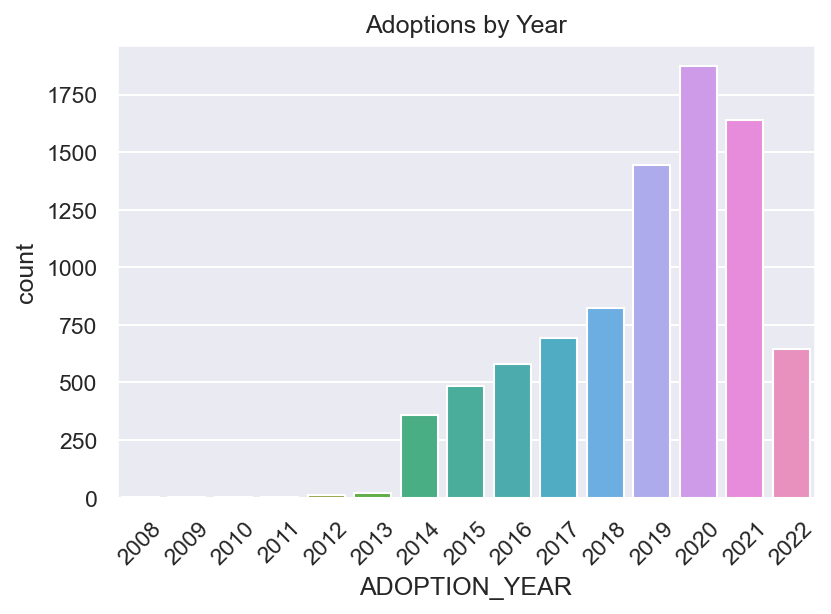

In [87]:
#Count of Adoptions by year
sns.set_theme()
plt.figure(dpi=150)
sns.countplot(x ='ADOPTION_YEAR', data = oar_data)
plt.xticks(rotation = 45)
plt.title('Adoptions by Year')

Text(0.5, 1.0, 'Adoptions by Year by Sex')

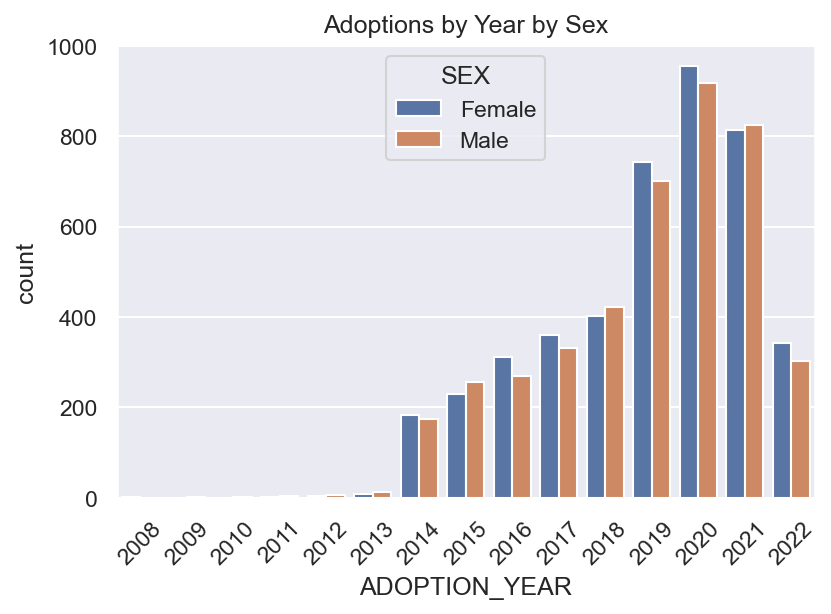

In [86]:
#Count of adoptions by year by sex
sns.set_theme()
plt.figure(dpi=150)
sns.countplot(x = 'ADOPTION_YEAR', data = oar_data, hue = 'SEX')
plt.xticks(rotation=45)
plt.title('Adoptions by Year by Sex')

---
## Next we will look at the adoption numbers by some characteristics such as breed, coloring, and shelter location.
---

### Adoptions by breed

In [74]:
adoptions_by_breed = oar_data.groupby('BREEDNAME').agg({'ADOPTIONNUMBER': 'count'})

In [75]:
adoptions_by_breed.sort_values('ADOPTIONNUMBER', ascending = False)

,ADOPTIONNUMBER
BREEDNAME,
Domestic Short Hair,6817
Domestic Medium Hair,948
Domestic Long Hair,546
Siamese Mix,204
Maine Coon Mix,18
Snowshoe Mix,15
Persian Mix,5
Rex Mix,5
Himalayan Mix,4


Text(0.5, 1.0, 'Adoptions by Breed')

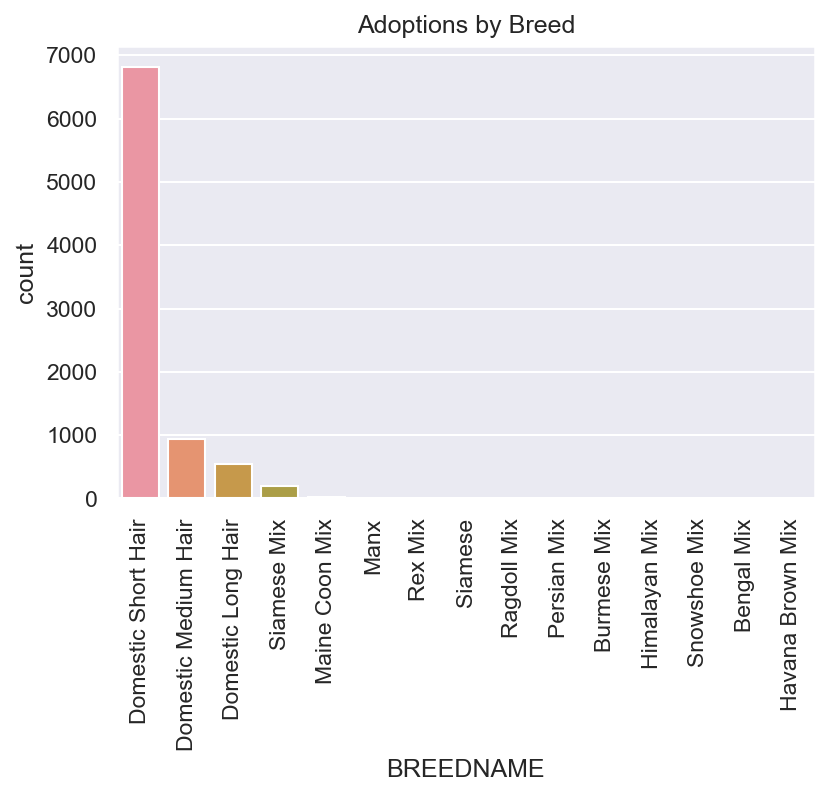

In [85]:
#Count of adoptions by breed
sns.set_theme()
plt.figure(dpi=150)
sns.countplot(x = 'BREEDNAME', data = oar_data)
plt.xticks(rotation=90)
plt.title('Adoptions by Breed')

### Adoptions by Coloring

In [77]:
adoptions_by_color = oar_data.groupby(oar_data['BASECOLOUR']).agg({'ADOPTIONNUMBER': 'count'})

In [78]:
adoptions_by_color.sort_values('ADOPTIONNUMBER', ascending = False)

,ADOPTIONNUMBER
BASECOLOUR,
Black,1210
Brown Tabby,1171
Black and White,1083
Brown Tabby and White,865
Orange Tabby,560
Orange Tabby and White,420
Gray,393
Gray and White,375
Tortie,333


Text(0.5, 1.0, 'Adoptions by Coloring')

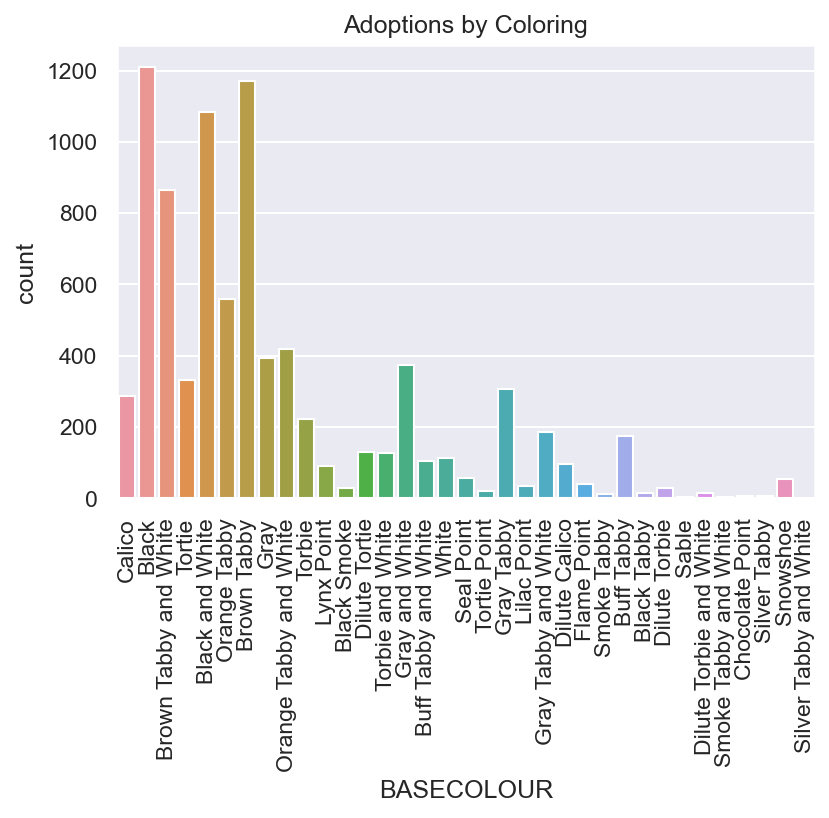

In [84]:
#Count of adoptions by coloring
sns.set_theme()
plt.figure(dpi=150)
sns.countplot(x = 'BASECOLOUR', data = oar_data)
plt.xticks(rotation=90)
plt.title('Adoptions by Coloring')

### Adoptions by Shelter Location

In [80]:
adoptions_by_location = oar_data.groupby('LOCATIONNAME').agg({'ADOPTIONNUMBER': 'count'})

In [81]:
adoptions_by_location.sort_values('ADOPTIONNUMBER', ascending = False)

,ADOPTIONNUMBER
LOCATIONNAME,
Lobby Hallway,1258
Kitten Room,859
Show Room,802
Purple Room,802
Adoption Room 8,656
Orange Room,557
Tan Room,493
Green Room,472
Adoption Room 7,442


Text(0.5, 1.0, 'Adoptions by Shelter Location')

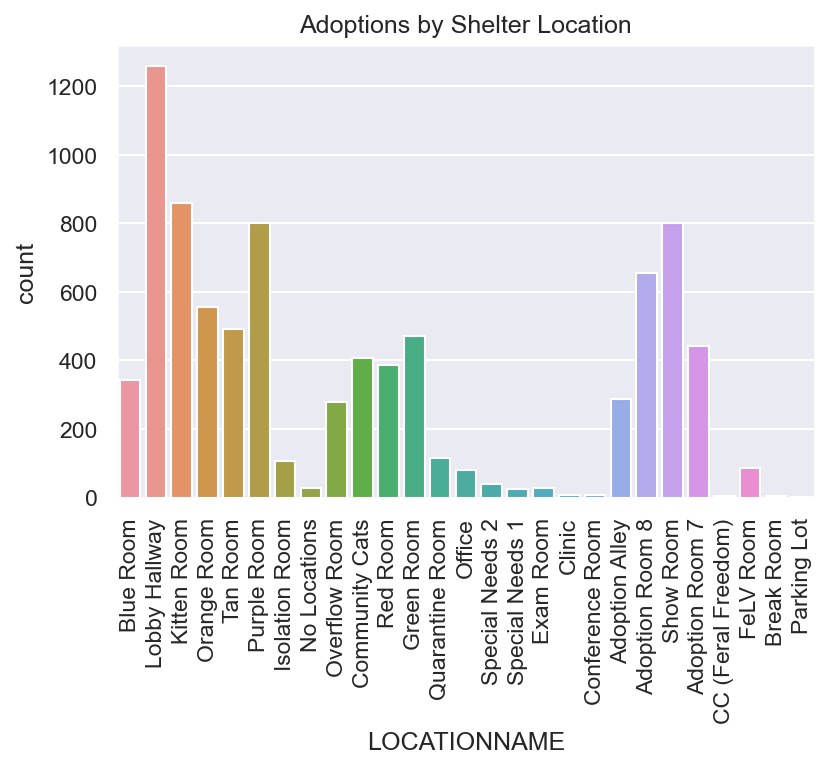

In [88]:
#Count of adoptions by shelter location
sns.set_theme()
plt.figure(dpi=150)
sns.countplot(x = 'LOCATIONNAME', data = oar_data)
plt.xticks(rotation=90)
plt.title('Adoptions by Shelter Location')

### Next we will look at the adoptions by year for cats who have Feline Leukemia Virus (FELV) and Feline Immunodeficiency Virus (FIV). 

### Cats with FELV must be isolated in the shelter and can only live with other cats who have FELV or other animals, since FELV is a serious illness that can be spread through casual contact such as sharing food and water bowls. 

### Cats with FIV can live with cats who do not have FIV since it is considered a less serious illness, generally does not affect the cat's life span, and is not spread through casual contact. 

In [82]:
pd.pivot_table(oar_data, index=['FELV_STATUS','FIV_STATUS'], values=['ADOPTIONNUMBER'], aggfunc='count', columns=['ADOPTION_YEAR'], fill_value = 0)

ADOPTIONNUMBER                                          \
ADOPTION_YEAR                    2008 2009 2010 2011 2012 2013 2014 2015 2016   
FELV_STATUS FIV_STATUS                                                          
FELV+       FIV+                    0    0    0    0    0    0    0    0    0   
            FIV-                    0    0    0    0    0    0    0    1    0   
FELV-       FIV+                    0    0    0    0    0    0    9   21   18   
            FIV-                    2    1    1    5   10   20  349  464  563   

                                                         
ADOPTION_YEAR          2017 2018  2019  2020  2021 2022  
FELV_STATUS FIV_STATUS                                   
FELV+       FIV+          0    0     2    12     8    2  
            FIV-          2    1    24    63    59   21  
FELV-       FIV+         20   24    55   111   108   35  
            FIV-        670  800  1364  1687  1464  586